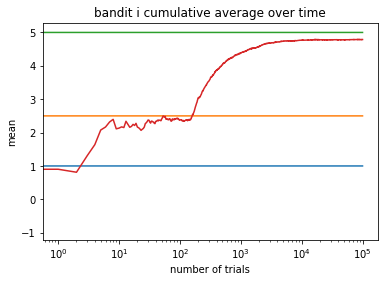

bandit1 mean estimate: 1.019 | true mean: 1.0
bandit2 mean estimate: 2.506 | true mean: 2.5
bandit3 mean estimate: 5.001 | true mean: 5.0
percent optimal selected = (0.1, 0.93335)


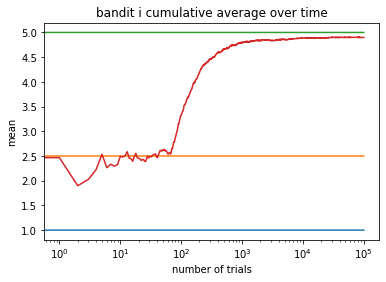

bandit1 mean estimate: 0.995 | true mean: 1.0
bandit2 mean estimate: 2.508 | true mean: 2.5
bandit3 mean estimate: 5.012 | true mean: 5.0
percent optimal selected = (0.05, 0.96551)


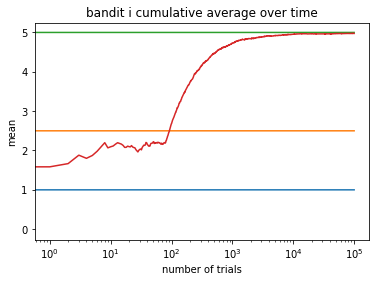

bandit1 mean estimate: 0.982 | true mean: 1.0
bandit2 mean estimate: 2.432 | true mean: 2.5
bandit3 mean estimate: 4.999 | true mean: 5.0
percent optimal selected = (0.01, 0.99268)



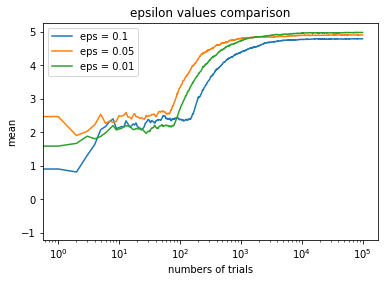

In [32]:
import matplotlib.pyplot as plt
import numpy as np

class Bandit:
  def __init__(self, m):
    self.m = m # the true mean for the bandit machine
    self.m_estimate = 0. # estimation of the true mean, intialized to 0
    self.N = 0. # number of samples collected

  def pull(self):
    # draw a sample with surrounding a normal distribution of mean 0, std 1
    return np.random.randn() + self.m

  def update(self, x):
    # increment numbers of samples collected
    self.N += 1.
    # calculate the new mean from the previous mean and the newly obtained value
    self.m_estimate = (1- 1.0 / self.N) * self.m_estimate + 1.0 / self.N * x

def run_experiment(bandits_m_list, eps, N):
  bandits = [Bandit(m) for m in bandits_m_list]
  
  # count number of suboptimal choices
  means = np.array(bandits_m_list)
  optimal_j = np.argmax(means)
  count_optimal = 0

  data = np.empty(N)

  for i in range(N):
    # use epsilon_greedy to select the next bandit
    if np.random.random() < eps:
      j = np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j == optimal_j:
      count_optimal += 1

    # for the plot
    data[i] = x
  
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot the cumulative average alongside the true means in log scale
  for m in bandits_m_list:
    plt.plot(np.ones(N) * m)
  plt.plot(cumulative_average)
  plt.title('bandit i cumulative average over time')
  plt.xlabel('number of trials')
  plt.ylabel('mean') 
  plt.xscale('log')
  plt.show()

  # print mean estimates for each bandit
  for i, b in enumerate(bandits):
    print(f'bandit{i+1} mean estimate: {round(b.m_estimate, 3)} | true mean: {b.m}')

  print(f'percent optimal selected = {eps, float(count_optimal) / N}')

  return cumulative_average

if __name__ == '__main__':
  # simulate three bandit machines with mean 1, 2.5, and 5
  bandits_m_list = [1.0, 2.5, 5.0]

  # get the cumulative rewards for the bandit problem with varying epsilon
  c_1 = run_experiment(bandits_m_list, 0.1, 100000)
  c_05 = run_experiment(bandits_m_list, 0.05, 100000)
  c_01 = run_experiment(bandits_m_list, 0.01, 100000)
  
  # epsilon value comparison
  print()
  plt.plot(c_1, label = 'eps = 0.1')
  plt.plot(c_05, label = 'eps = 0.05')
  plt.plot(c_01, label = 'eps = 0.01')
  plt.title('epsilon values comparison')
  plt.xlabel('numbers of trials')
  plt.ylabel('mean') 
  plt.legend()
  plt.xscale('log')
  plt.show()